In [44]:
import numpy as np
from bokeh.plotting import figure, output_notebook, show
import matplotlib.pyplot as plt

In [45]:
def split(u, v, points):
    # return points on left side of UV
    return [p for p in points if np.cross(p - u, v - u) < 0]

def extend(u, v, points):
    if not points:
        return []

    # find furthest point W, and split search to WV, UW
    w = min(points, key=lambda p: np.cross(p - u, v - u))
    p1, p2 = split(w, v, points), split(u, w, points)
    return extend(w, v, p1) + [w] + extend(u, w, p2)

def convex_hull(points):
    # find two hull points, U, V, and split to left and right search
    u = min(points, key=lambda p: p[0])
    v = max(points, key=lambda p: p[0])
    left, right = split(u, v, points), split(v, u, points)
    
    # find convex hull on each side
    return [v] + extend(u, v, left) + [u] + extend(v, u, right) + [v]

In [46]:
points = np.random.rand(100, 2)
hull = np.array(convex_hull(points))
hull

array([[ 0.99533483,  0.49411723],
       [ 0.98072765,  0.9144536 ],
       [ 0.70482881,  0.98063321],
       [ 0.36515096,  0.9936179 ],
       [ 0.01995745,  0.94125288],
       [ 0.01873721,  0.55857858],
       [ 0.01996463,  0.22632487],
       [ 0.05931013,  0.04987382],
       [ 0.33023102,  0.02581013],
       [ 0.92535984,  0.03682245],
       [ 0.96684783,  0.06929628],
       [ 0.99401604,  0.40174521],
       [ 0.99533483,  0.49411723]])

In [47]:
output_notebook()

plot = figure()
plot.scatter(x=points[:, 0], y=points[:, 1])
plot.line(x=hull[:, 0], y=hull[:, 1], color='red')

show(plot)

Loading BokehJS ...

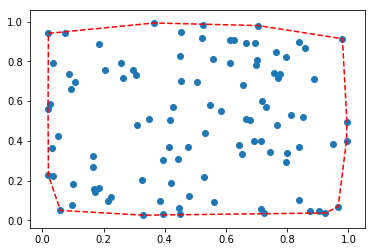

In [48]:
%matplotlib inline
#output_notebook()

#plot = figure()
plt.scatter(x=points[:, 0], y=points[:, 1])
plt.plot(hull[:, 0], hull[:, 1], 'r--')

#show(plot)

In [49]:
from scipy.spatial import ConvexHull
hull = ConvexHull(points)

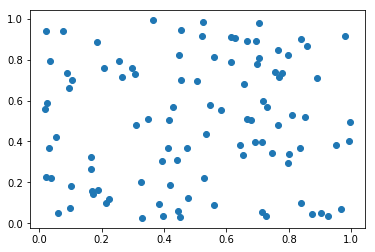

In [50]:
plt.plot(points[:,0], points[:,1], 'o')


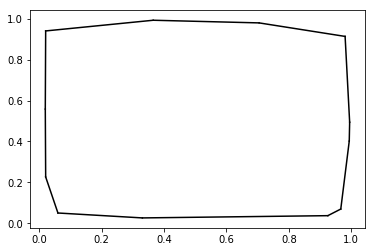

In [51]:
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

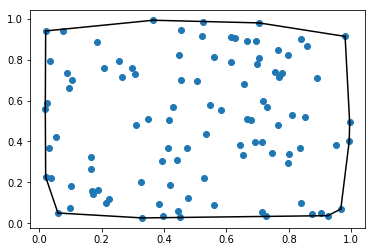

In [52]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

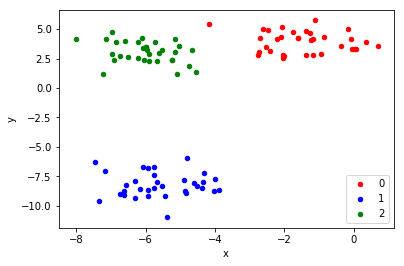

In [53]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [54]:
df.head()

,label,x,y
0,0,-0.941781,2.885853
1,1,-4.872664,-8.710963
2,0,-2.765719,2.777609
3,0,-1.609140,4.206028
4,0,-2.009970,2.694397
